#**Prediction Of Breast Cancer Using Classification Model**

**Data Loading**

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
path = "/content/data.csv"
df_cancer = pd.read_csv(path)
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_cancer.shape

(569, 32)

In [ ]:
df_cancer.min()

,0
id,8670
diagnosis,B
radius_mean,6.981
texture_mean,9.71
perimeter_mean,43.79
area_mean,143.5
smoothness_mean,0.05263
compactness_mean,0.01938
concavity_mean,0.0
concave_points_mean,0.0


In [ ]:
df_cancer.area_worst.mean()

880.5831282952548

In [ ]:
df_cancer.max()

,0
id,911320502
diagnosis,M
radius_mean,28.11
texture_mean,39.28
perimeter_mean,188.5
area_mean,2501.0
smoothness_mean,0.1634
compactness_mean,0.3454
concavity_mean,0.4268
concave_points_mean,0.2012


In [ ]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df_cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


**Data Cleaning**

In [ ]:
#Drop Irrelevant Data
df_cancer.drop(["id"], axis = 1, inplace = True)

In [ ]:
df_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Converting categorical variables to numericals ones
df_cancer.diagnosis = [1 if value == "M" else 0 for value in df_cancer.diagnosis]

In [ ]:
df_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Training And Testing**

In [ ]:
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']

In [ ]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [ ]:
s=StandardScaler()

X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

**Logistic Regression**

In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_accuracy_percentage = logistic_accuracy
print(f"Logistic Regression Accuracy: {logistic_accuracy*100:.2f}%")

Logistic Regression Accuracy: 97.08%


**Decision Tree Regression**

In [ ]:
# 2. Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
decision_tree_pred = decision_tree_model.predict(X_test)

# Calculate accuracy
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_accuracy_percentage = decision_tree_accuracy
print(f"Decision Tree Accuracy: {decision_tree_accuracy*100:.2f}%")

Decision Tree Accuracy: 84.80%


**Random Forest Regression**

In [ ]:
# 3. Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
random_forest_pred = random_forest_model.predict(X_test)

# Calculate accuracy
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_accuracy_percentage = random_forest_accuracy
print(f"Random Forest Accuracy: {random_forest_accuracy*100:.2f}%")

Random Forest Accuracy: 97.08%


**Evaluation**

In [ ]:
#Predicting on new data using Logistic Regression
new_data = np.array([[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                      1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                      25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
std_data = s.transform(new_data)
prediction = logistic_model.predict(std_data)
print(prediction)

if(prediction == 0):
  print("Benign")
else:
  print("Malignant")

[1]
Malignant


In [ ]:
#Predicting on new data using Decision Tree Regression
new_data = np.array([[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                      1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                      25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
std_data = s.transform(new_data)
prediction = decision_tree_model.predict(std_data)
print(prediction)

if(prediction == 0):
  print("Benign")
else:
  print("Malignant")

[1]
Malignant


In [ ]:
#Predicting on new data using Random Forest Regression
new_data = np.array([[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                      1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                      25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
std_data = s.transform(new_data)
prediction = random_forest_model.predict(std_data)
print(prediction)

if(prediction == 0):
  print("Benign")
else:
  print("Malignant")

[1]
Malignant


In [ ]:
# Generate predictions
logistic_pred = logistic_model.predict(X_test)

# Print the first 5 predictions
print("Logistic Regression Predictions:", logistic_pred[:5])

Logistic Regression Predictions: [1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Generate predictions
decision_tree_pred = decision_tree_model.predict(X_test)

# Print the first 5 predictions
print("Decision Tree Regression  Predictions:", decision_tree_pred[:5])

Decision Tree Regression  Predictions: [1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Generate predictions
random_forest_pred = random_forest_model.predict(X_test)

# Print the first 5 predictions
print("Random Forest Regression Predictions:", random_forest_pred[:5])


Random Forest Regression Predictions: [1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Convert to DataFrame for better visualization
results = pd.DataFrame({"Model": ['Logistic Regression', 'Random Forest Regression', 'Decision Tree Regression'],
    "Accuracy": [logistic_accuracy*100, random_forest_accuracy*100, decision_tree_accuracy*100],
    "Prediction": [list(logistic_pred[:5]), list(random_forest_pred[:5]), list(decision_tree_pred[:5])]})
results

,Model,Accuracy,Prediction
0,Logistic Regression,97.076023,"[1, 1, 1, 1, 1]"
1,Random Forest Regression,97.076023,"[1, 1, 1, 1, 1]"
2,Decision Tree Regression,84.795322,"[1, 1, 1, 1, 1]"


**Data Visualization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df_cancer = df_cancer.copy()

In [ ]:
sns.set(style = "whitegrid")

<ipython-input-39-b3750b0f894b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df_cancer, palette='viridis')


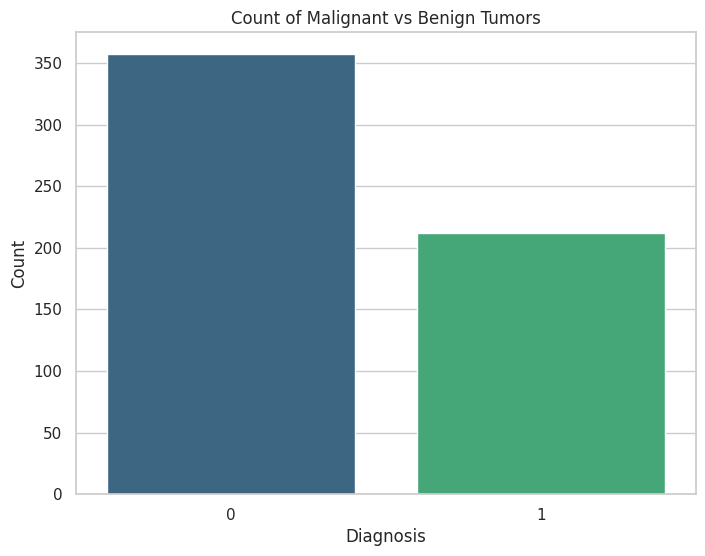

In [ ]:
# Bar graph for the count of Malignant vs Benign tumors
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df_cancer, palette='viridis')
plt.title('Count of Malignant vs Benign Tumors')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

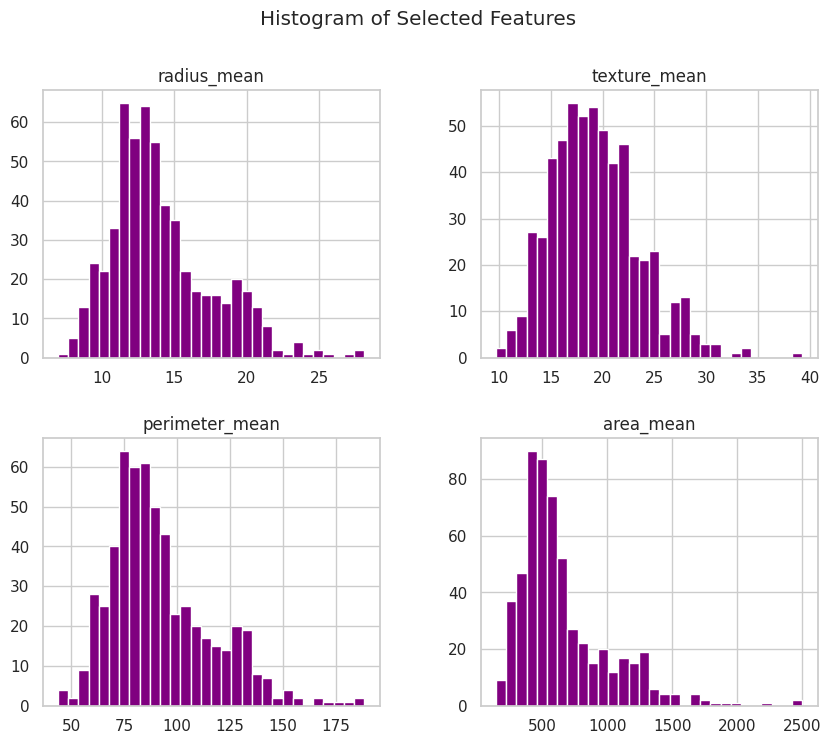

In [ ]:
# 2. Histogram of a few selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
df_cancer[features].hist(bins=30, figsize=(10, 8), color='purple')
plt.suptitle('Histogram of Selected Features')
plt.show()

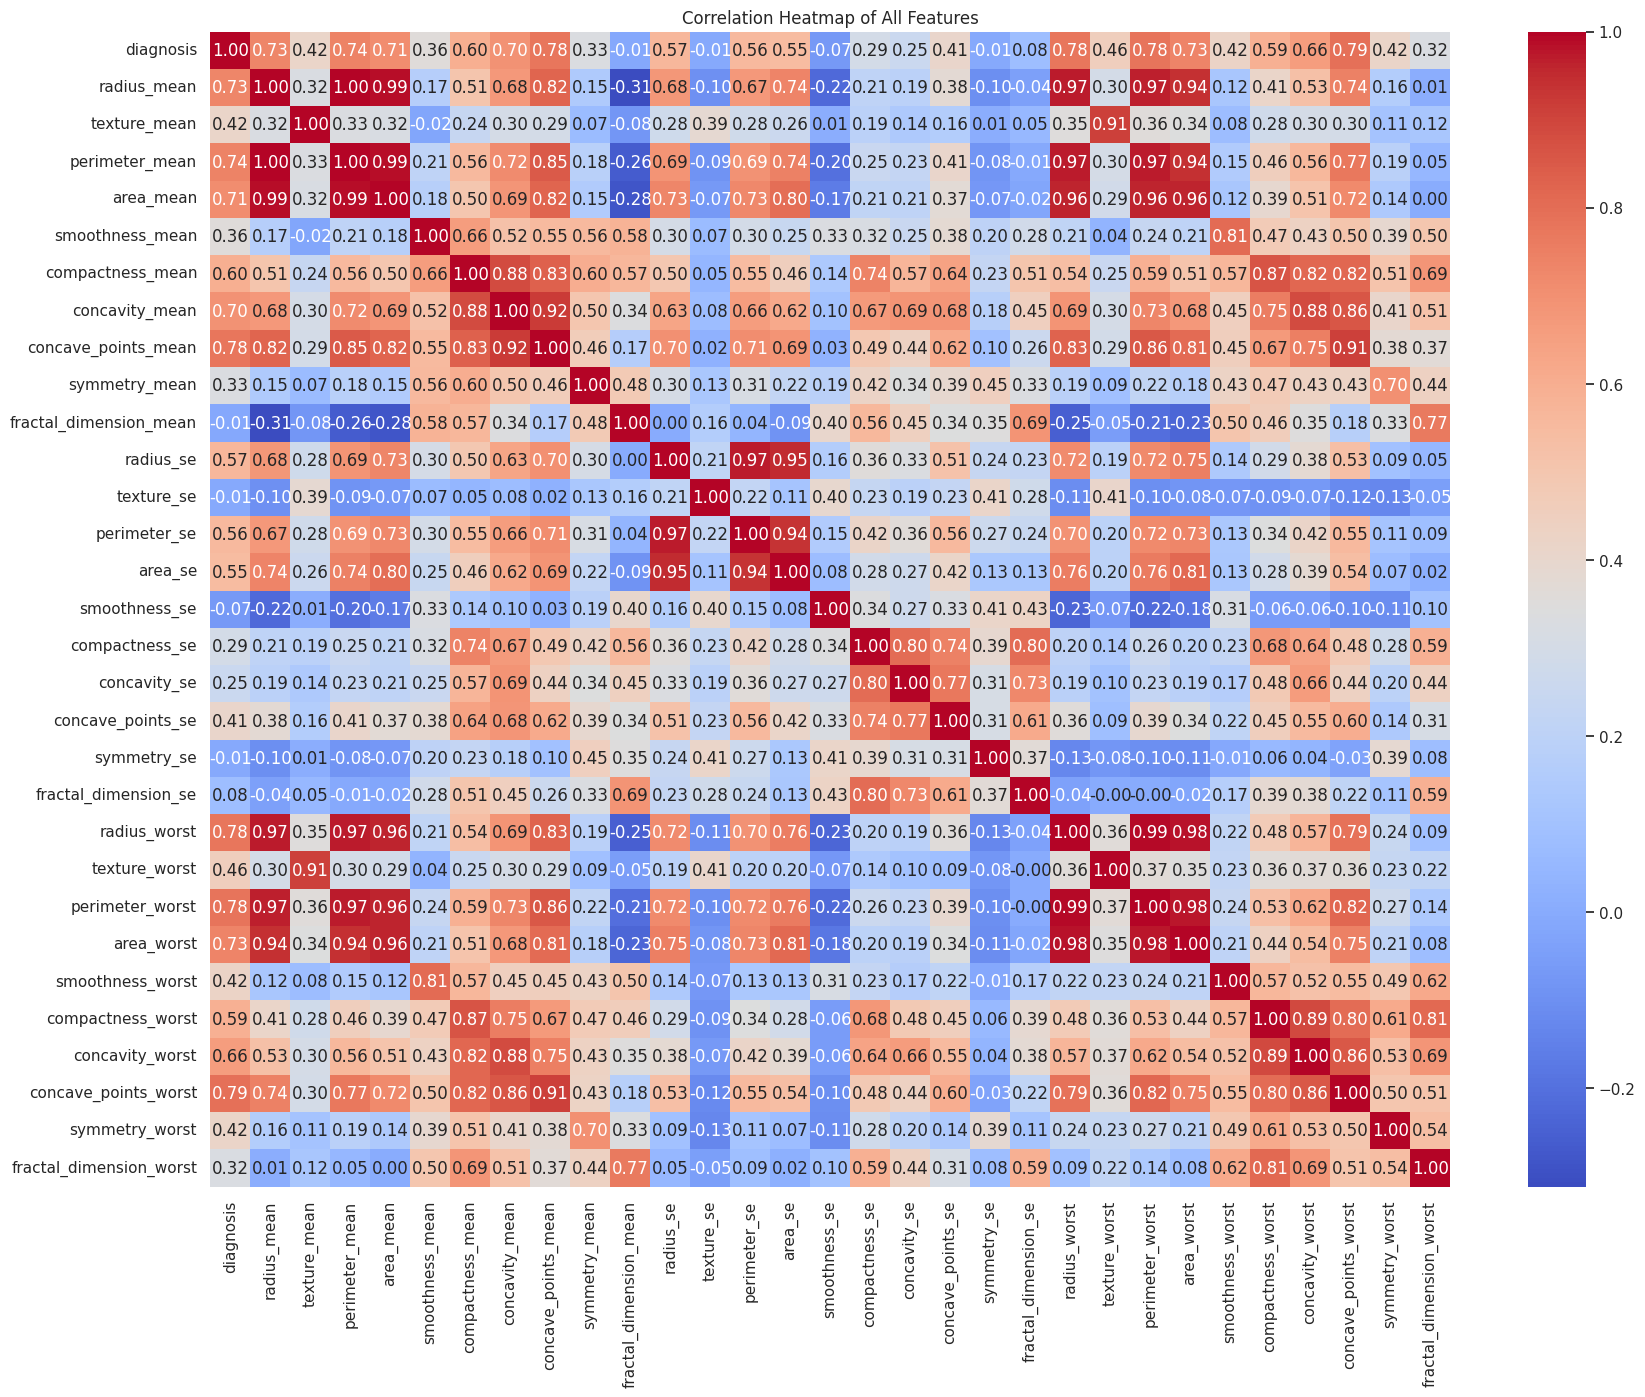

In [ ]:
# 4. Correlation heatmap of all features
plt.figure(figsize=(20, 15))
corr_matrix = df_cancer.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

<ipython-input-93-b9cea2055d32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df_cancer, palette='coolwarm')


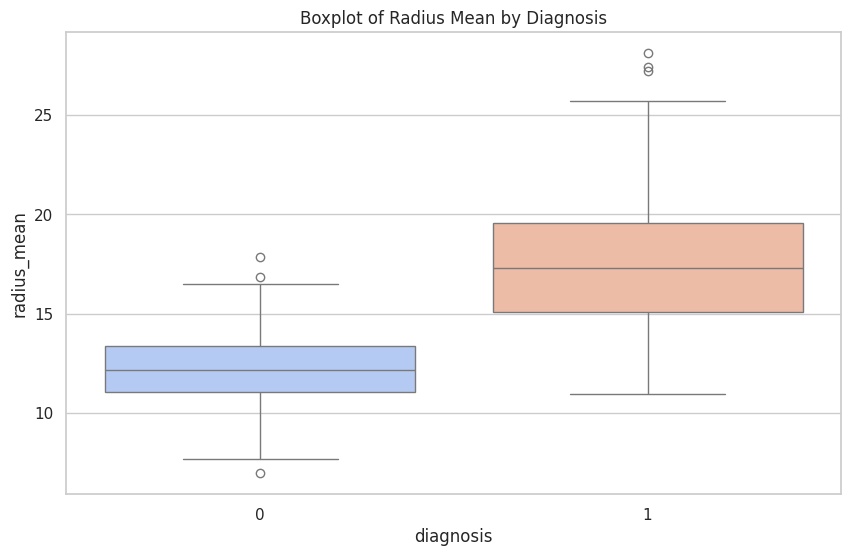

In [ ]:
# 5. Box plot for comparing distributions of a selected feature across diagnosis groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df_cancer, palette='coolwarm')
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

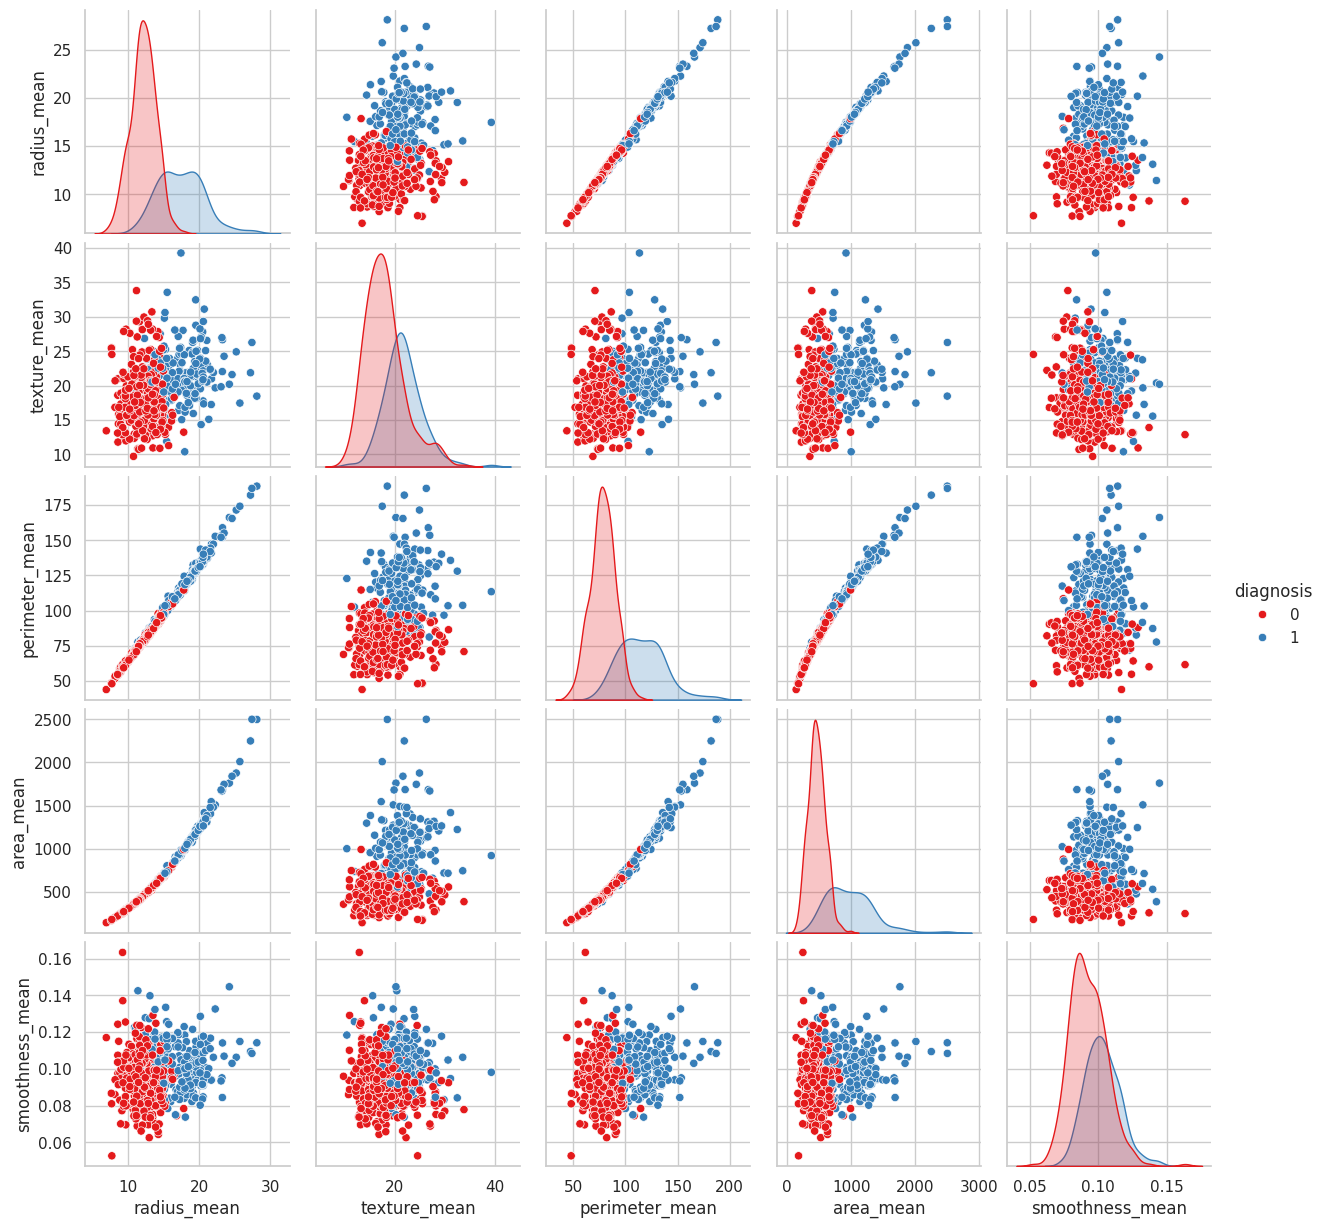

In [ ]:
# 7. Pairwise relationships between features using pairplot
sns.pairplot(df_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']],
             hue='diagnosis', palette='Set1')
plt.show()

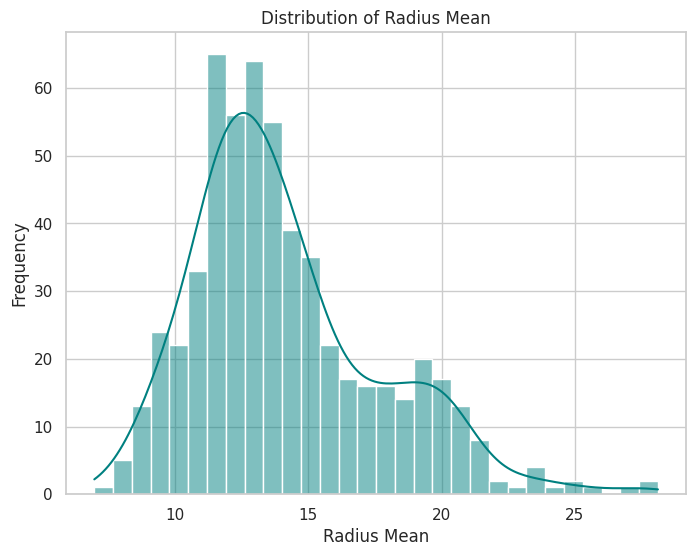

In [ ]:
# Histogram for the distribution of a specific feature (e.g., radius_mean)
plt.figure(figsize=(8, 6))
sns.histplot(df_cancer['radius_mean'], kde=True, bins=30, color='teal')
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

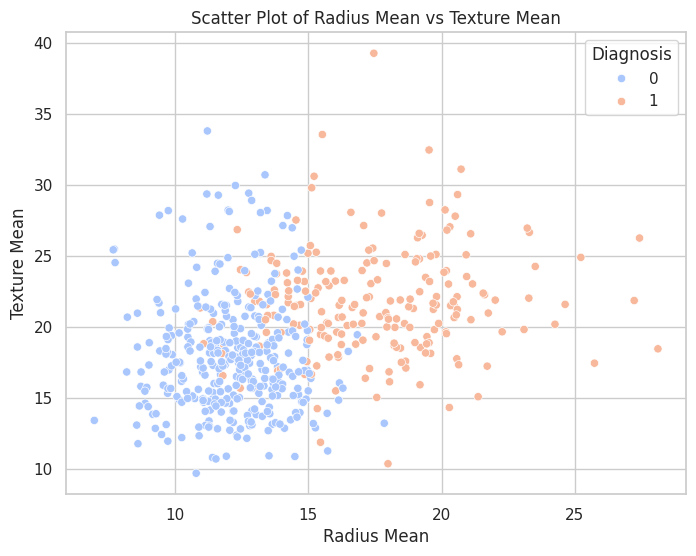

In [ ]:
# Scatter plot to show the relationship between radius_mean and texture_mean
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df_cancer, palette='coolwarm')
plt.title('Scatter Plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

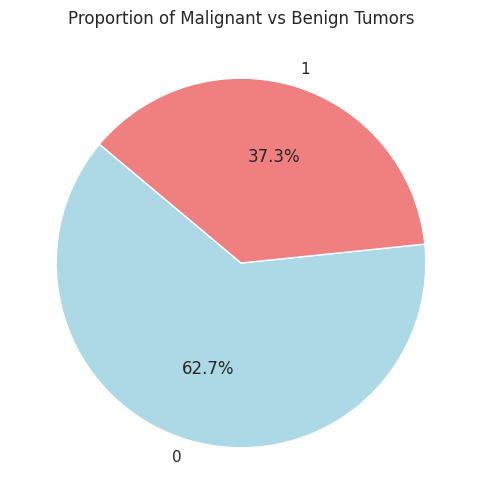

In [ ]:
# Pie chart showing the proportion of malignant vs benign tumors
diagnosis_counts = df_cancer['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Proportion of Malignant vs Benign Tumors')
plt.show()

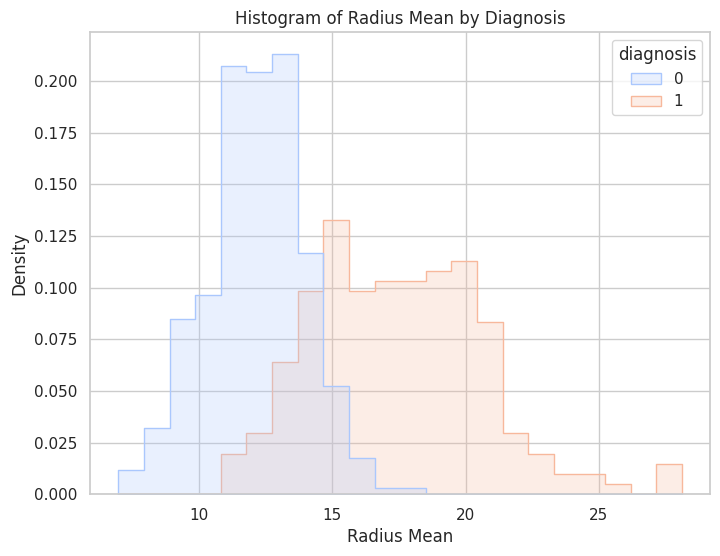

In [ ]:
# Combined histogram for 'radius_mean' by diagnosis
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cancer, x='radius_mean', hue='diagnosis', element='step', stat='density', common_norm=False, palette='coolwarm')
plt.title('Histogram of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.show()

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Melt the DataFrame to long format for Seaborn
results_melted = pd.melt(results, id_vars='Model', var_name='Metric', value_name='Score')

<Axes: xlabel='Metric', ylabel='Score'>

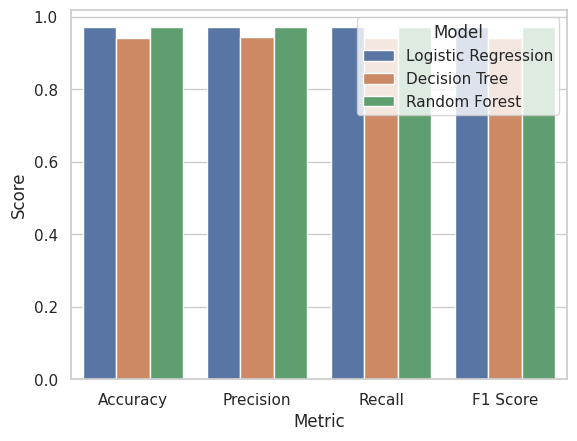

In [ ]:
# Create a barplot
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)